In [ ]:
! apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [ ]:
pip install SciencePlots

In [ ]:
import scienceplots
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science'])

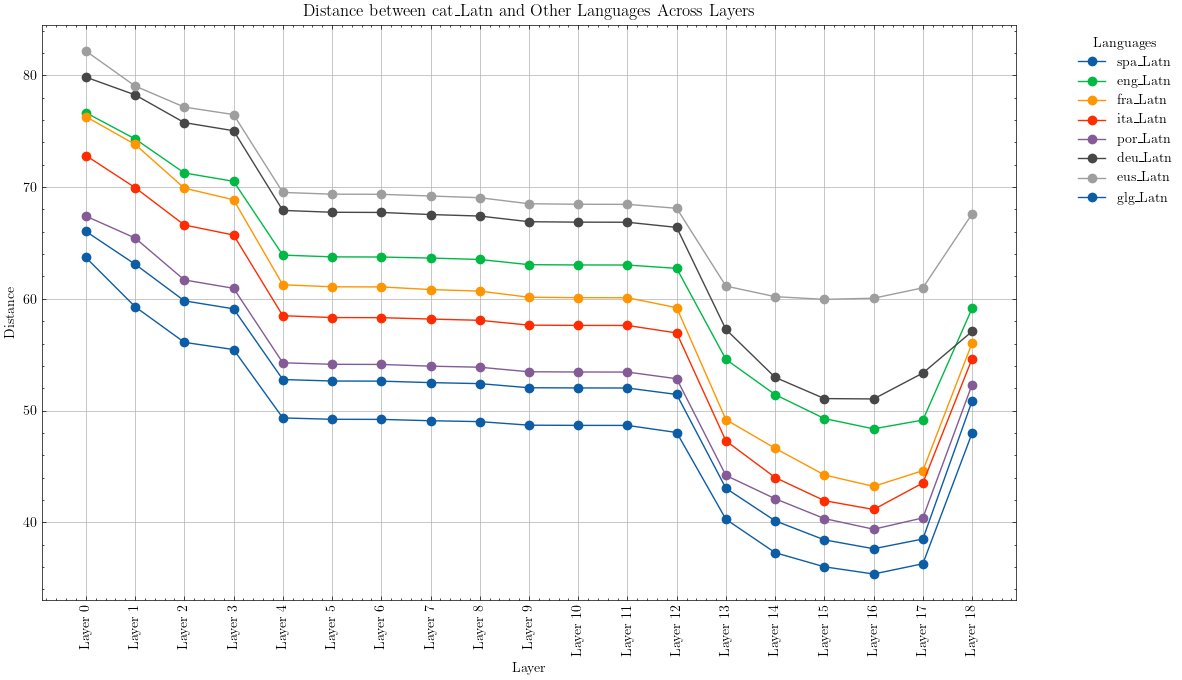

In [ ]:
BASE_DIR32 = '/content/drive/MyDrive/distances/checkpoint-385000_gemma32_distributed'
file_paths32 = [ f"{BASE_DIR32}/distances_layer{i}.npy" for i in range(0, 19)]

# Language labels corresponding to the indices in the distance matrices
labels = ['spa_Latn', 'eng_Latn', 'fra_Latn', 'ita_Latn', 'cat_Latn', 'por_Latn', 'deu_Latn', 'eus_Latn', 'glg_Latn']

MAIN_LANG = 'cat_Latn'
# Indices for cat_Latn
index_cat = labels.index(MAIN_LANG)

# Load all matrices once to avoid repeated loading
all_matrices32 = [np.load(path) for path in file_paths32]

# Set up the plot
plt.figure(figsize=(12, 7))
# Plot distances from cat_Latn to each other language across layers
for idx, label in enumerate(labels):
    if label != MAIN_LANG:  # Skip distance to itself
        # Gather distances for this language across all layers
        distances = [matrix[index_cat, idx] for matrix in all_matrices32]
        # Plot the distances
        plt.plot(range(len(file_paths32)), distances, marker='o', linestyle='-', label=label)

# Customize the plot
plt.title(f'Distance between {MAIN_LANG} and Other Languages Across Layers')
plt.xlabel('Layer')
plt.ylabel('Distance')
plt.xticks(range(len(file_paths32)), [f"Layer {i}" for i in range(len(file_paths32))], rotation=90)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define base directories for different sizes
BASE_DIR32 = '/content/drive/MyDrive/distances/checkpoint-645000_gemma32_distributed'
BASE_DIR128 = '/content/drive/MyDrive/distances/checkpoint-570000_gemma128_distributed'
BASE_DIR256 = '/content/drive/MyDrive/distances/checkpoint-540000_gemma256_distributed'

# Generate file paths for each directory
file_paths32 = [f"{BASE_DIR32}/distances_layer{i}.npy" for i in range(19)]
file_paths128 = [f"{BASE_DIR128}/distances_layer{i}.npy" for i in range(19)]
file_paths256 = [f"{BASE_DIR256}/distances_layer{i}.npy" for i in range(19)]

labels = ['spa_Latn', 'eng_Latn', 'fra_Latn', 'ita_Latn', 'cat_Latn', 'por_Latn', 'deu_Latn', 'eus_Latn', 'glg_Latn']

# Load all matrices from different directories
all_matrices32 = [np.load(path) for path in file_paths32]
all_matrices128 = [np.load(path) for path in file_paths128]
all_matrices256 = [np.load(path) for path in file_paths256]

all_matrices_mean32  = [ i.mean(axis=1) for i in all_matrices32 ]
all_matrices_mean128 = [ i.mean(axis=1) for i in all_matrices128 ]
all_matrices_mean256 = [ i.mean(axis=1) for i in all_matrices256 ]

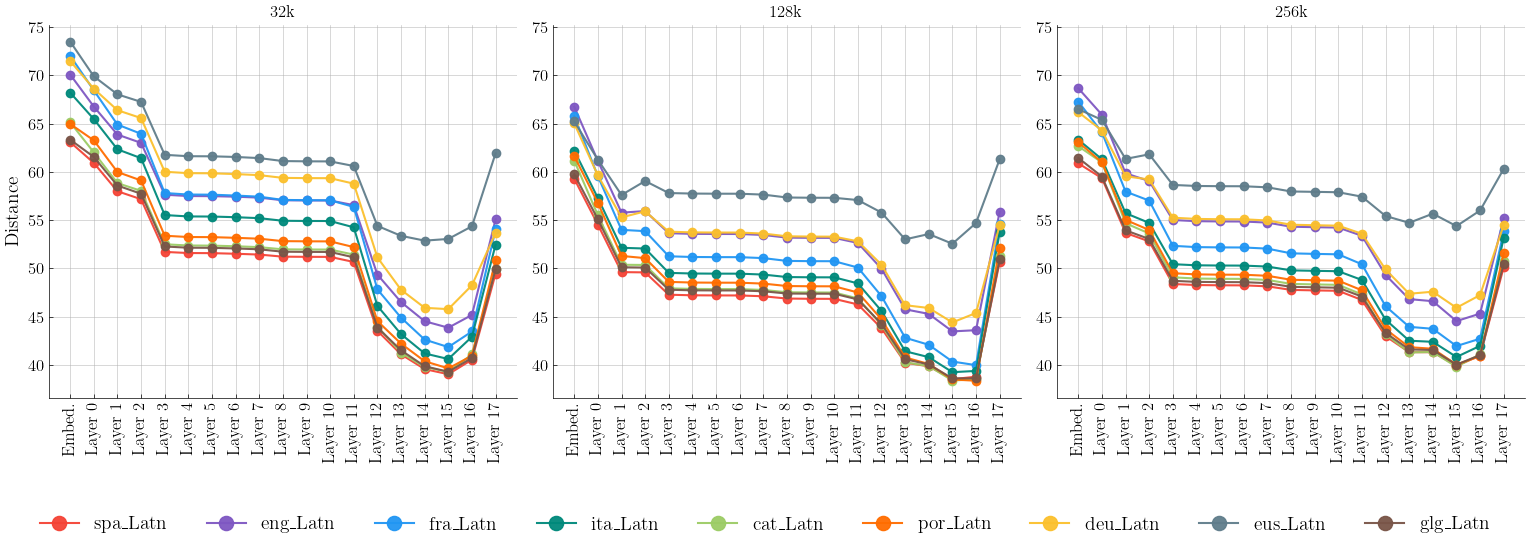

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a list of 10 different colors
colors = [
    '#F44336', '#7E57C2', '#2196F3',  '#00897B', '#9CCC65',  '#FF6D00', '#FBC02D', '#607D8B', '#795548', '#E91E63'
]

def plot_distances_all(ax, matrices, title_suffix, marker, distance, legend):
    ax.set_title(title_suffix)

    # Set the color cycle
    ax.set_prop_cycle(color=colors)

    for idx, label in enumerate(labels):
        distances = [matrix[idx] for matrix in matrices]
        ax.plot(range(len(distances)), distances, marker=marker, linestyle='-', label=label, linewidth=1.5, alpha=0.95)

    #ax.plot(range(len(distances)), [matrix.mean() for matrix in matrices], linestyle='-', label=label)
    ax.set_xlabel('')
    if distance:
        ax.set_ylabel('Distance', size=14)

    ax.set_xticks(range(len(distances)), [f"Layer {i-1}" if i != 0 else f"Embed." for i in range(len(distances))], rotation=90)

    if legend:
        ax.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='minor', width=0)
    ax.yaxis.set_ticks_position('left')  # Position y-axis ticks only on the left
    ax.xaxis.set_ticks_position('bottom')

# Assuming `labels` is defined elsewhere in your code

fig, axs = plt.subplots(1, 3, figsize=(15.5, 5.1), sharey=True)

# Plot for each size
plot_distances_all(axs[0], all_matrices_mean32, '32k', 'o', True, False)
plot_distances_all(axs[1], all_matrices_mean128, '128k', 'o', False, False)
plot_distances_all(axs[2], all_matrices_mean256, '256k', 'o', False, False)
fig.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=9, title='', fontsize=14, markerscale=1.7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('distances_group_by_lang.pdf', dpi=400)
plt.show()

In [ ]:
def plot_distances(ax, matrices, file_paths, title_suffix):
    ax.set_title(f'Distance between {MAIN_LANG} and Other Languages Across Layers ({title_suffix})')
    for idx, label in enumerate(labels):
        if label != MAIN_LANG:
            distances = [matrix[index_cat, idx] for matrix in matrices]
            ax.plot(range(len(file_paths)), distances, marker='o', linestyle='-', label=label)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Distance')
    ax.set_xticks(range(len(file_paths)), [f"Layer {i}" for i in range(len(file_paths))], rotation=90)
    ax.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

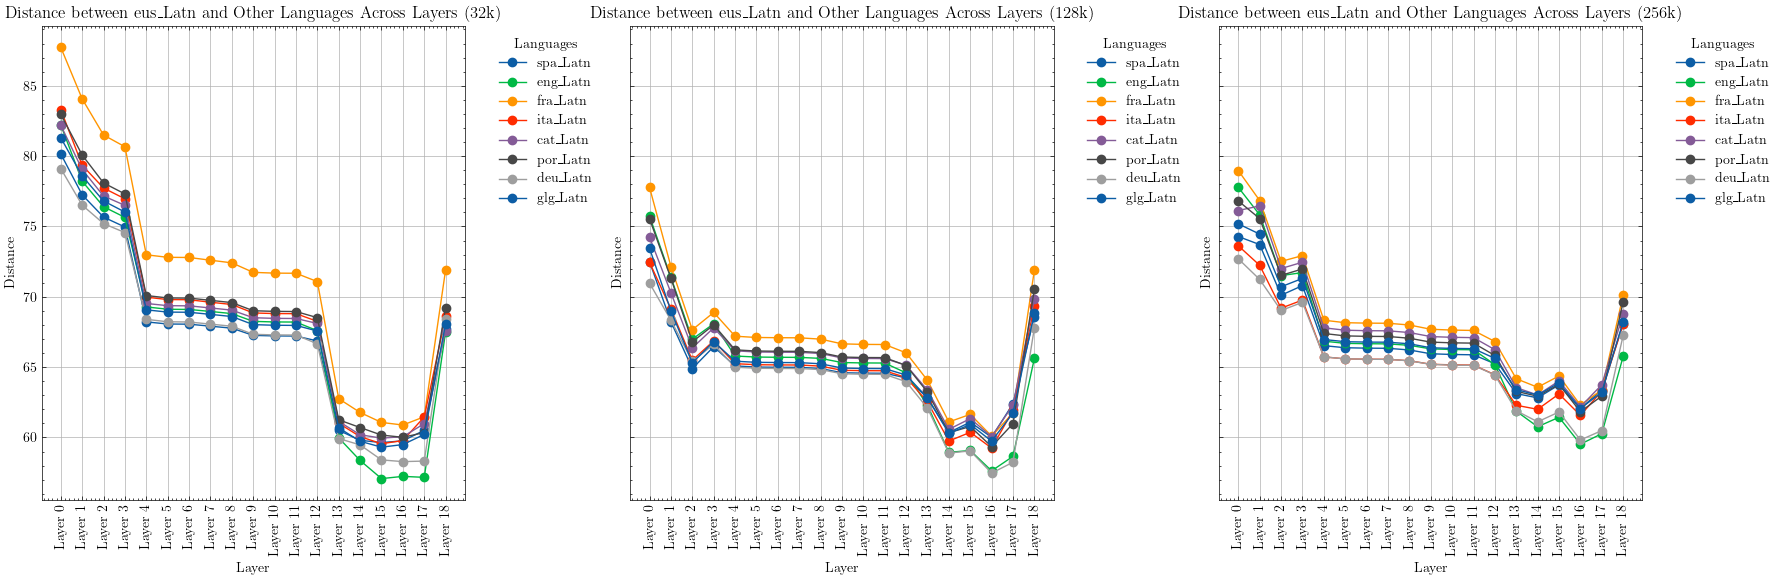

In [ ]:
MAIN_LANG = 'eus_Latn'
index_cat = labels.index(MAIN_LANG)
# Set up the plot with subplots for each embedding size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Plot for each size
plot_distances(axs[0], all_matrices32, file_paths32, '32k')
plot_distances(axs[1], all_matrices128, file_paths128, '128k')
plot_distances(axs[2], all_matrices256, file_paths256, '256k')
plt.tight_layout()
plt.show()

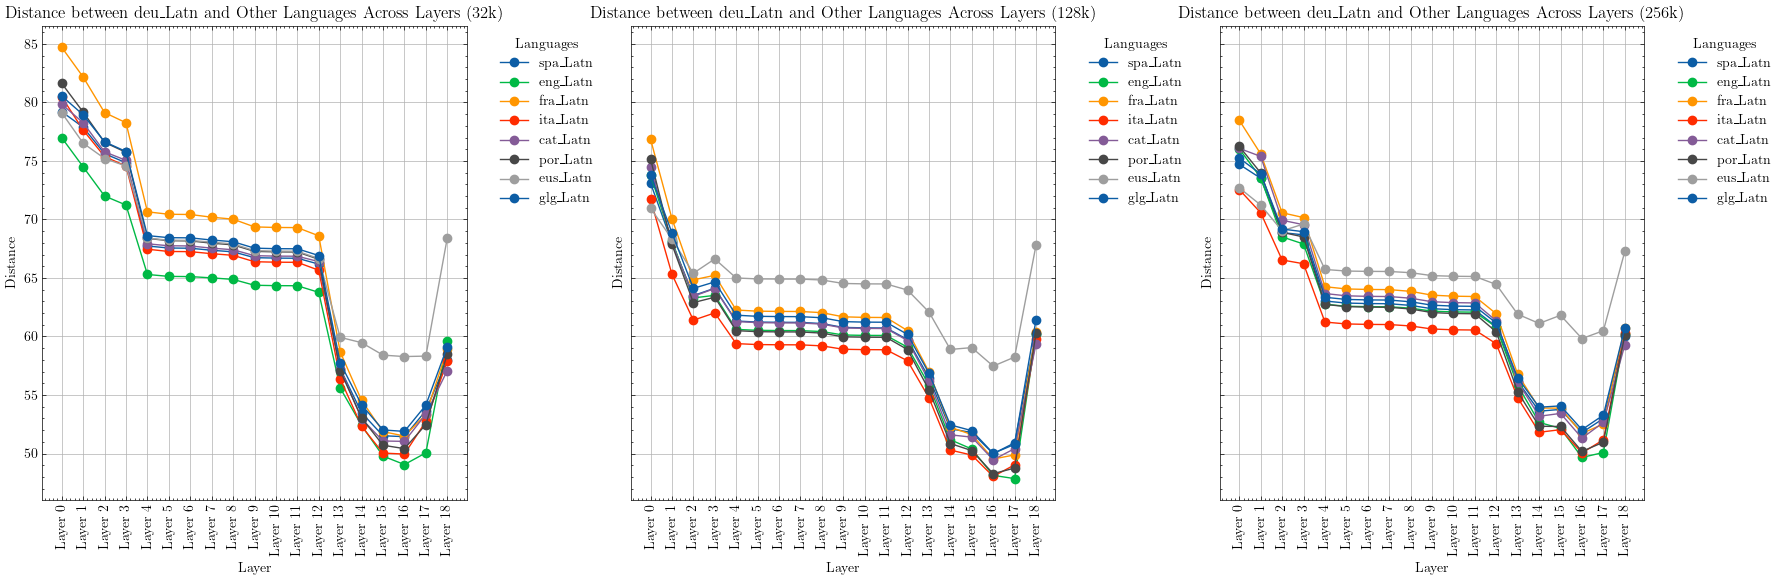

In [ ]:
MAIN_LANG = 'deu_Latn'
index_cat = labels.index(MAIN_LANG)
# Set up the plot with subplots for each embedding size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Plot for each size
plot_distances(axs[0], all_matrices32, file_paths32, '32k')
plot_distances(axs[1], all_matrices128, file_paths128, '128k')
plot_distances(axs[2], all_matrices256, file_paths256, '256k')
plt.tight_layout()
plt.show()

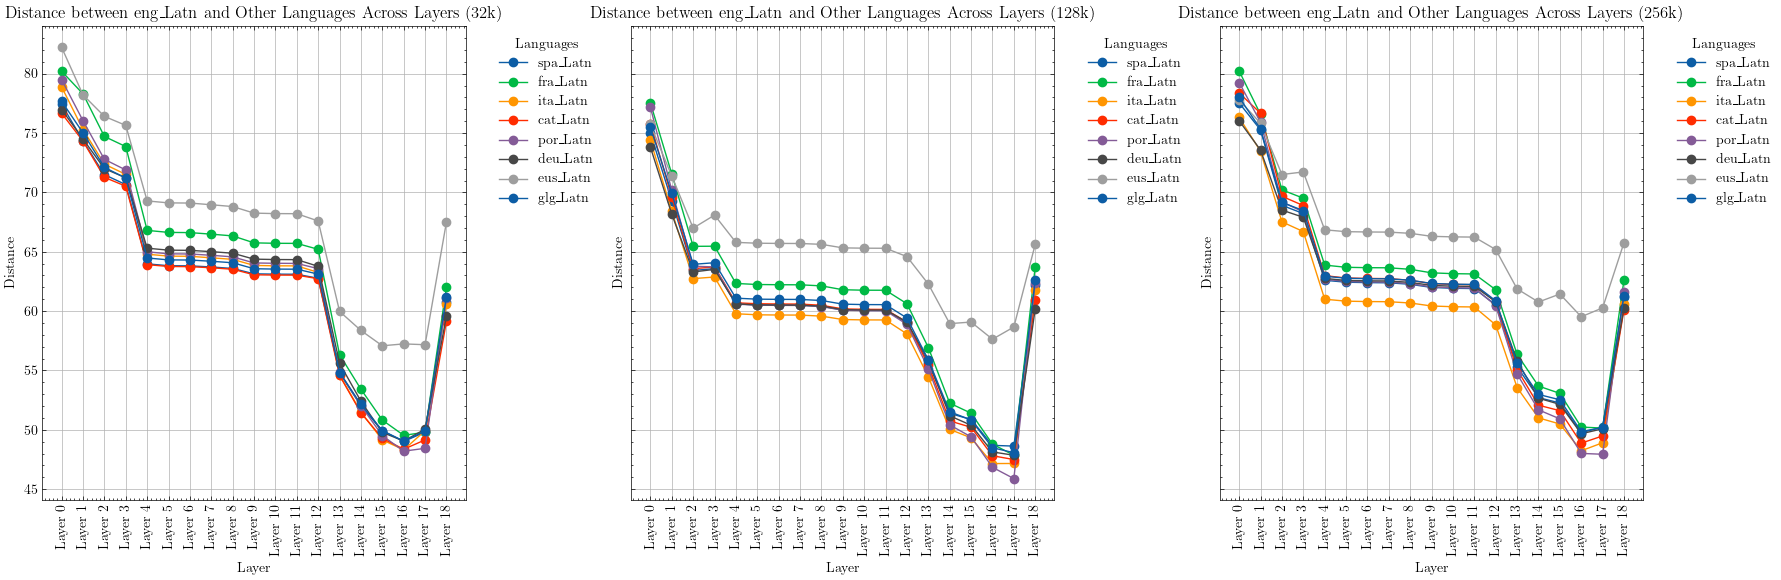

In [ ]:
MAIN_LANG = 'eng_Latn'
index_cat = labels.index(MAIN_LANG)
# Set up the plot with subplots for each embedding size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Plot for each size
plot_distances(axs[0], all_matrices32, file_paths32, '32k')
plot_distances(axs[1], all_matrices128, file_paths128, '128k')
plot_distances(axs[2], all_matrices256, file_paths256, '256k')
plt.tight_layout()
plt.show()

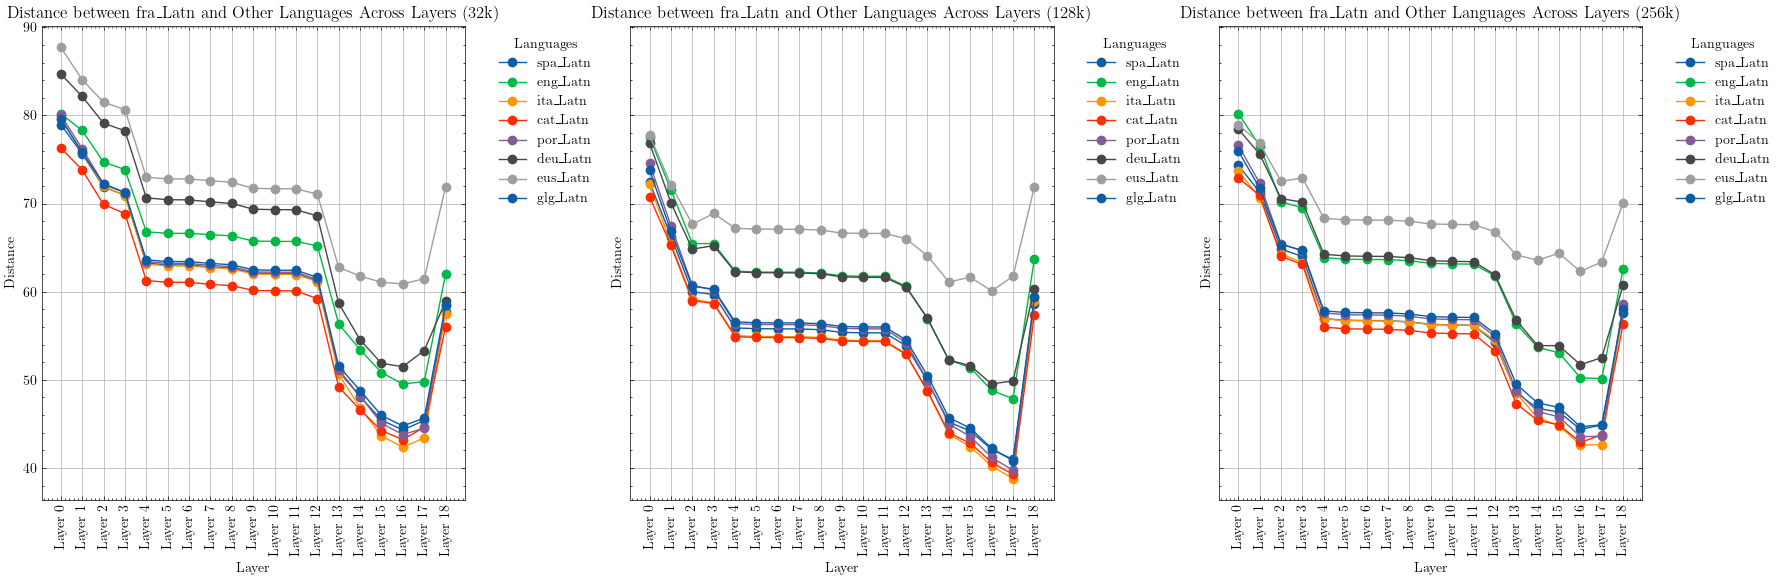

In [ ]:
MAIN_LANG = 'fra_Latn'
index_cat = labels.index(MAIN_LANG)
# Set up the plot with subplots for each embedding size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Plot for each size
plot_distances(axs[0], all_matrices32, file_paths32, '32k')
plot_distances(axs[1], all_matrices128, file_paths128, '128k')
plot_distances(axs[2], all_matrices256, file_paths256, '256k')
plt.tight_layout()
plt.show()

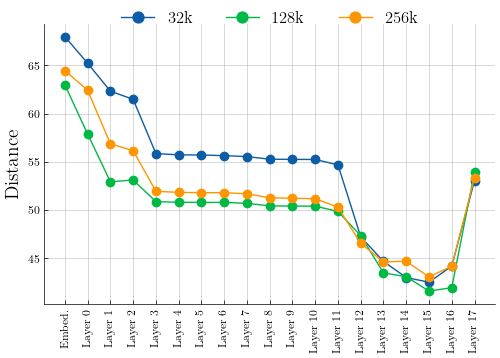

In [ ]:
# Set up the plot
plt.figure(figsize=(5.2, 3.8))

distances32 = [matrix.mean() for matrix in all_matrices32]
plt.plot(range(len(file_paths32)), distances32, marker='o', linestyle='-', label='32k')

distances128 = [matrix.mean() for matrix in all_matrices128]
plt.plot(range(len(file_paths128)), distances128, marker='o', linestyle='-', label='128k')

distances256 = [matrix.mean() for matrix in all_matrices256]
plt.plot(range(len(file_paths256)), distances256, marker='o', linestyle='-', label='256k')

# Customize the plot
#plt.title(f'Distance between {MAIN_LANG} and Other Languages Across Layers')

plt.xticks(range(len(file_paths32)), [f"Layer {i-1}" if i != 0 else f"Embed." for i in range(len(distances32))], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fontsize=12, markerscale=1.3)
plt.grid(True, alpha = 0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)  # Set major tick label size
ax.tick_params(axis='both', which='minor', width=0)
ax.yaxis.set_ticks_position('left')  # Position y-axis ticks only on the left
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Distance', fontsize=14)
#ax.set_ylabel('Layer', fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('distances_mean_v2.png', dpi = 300)
plt.show()

In [ ]:
dist_ALL = ( np.array(distances32) + np.array(distances128) + np.array(distances256) ) / 3

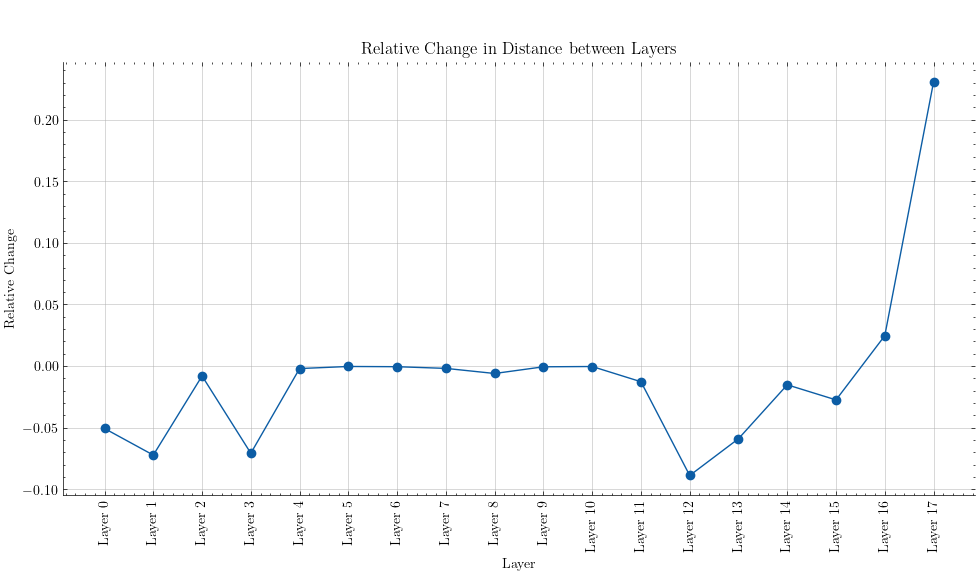

In [ ]:
def calculate_relative_change(distances):
    relative_changes = []
    for i in range(1, len(distances)):
        relative_change = (distances[i] - distances[i-1]) / distances[i-1]
        relative_changes.append(relative_change)
    return relative_changes

relative_changes = calculate_relative_change(dist_ALL)

# Plot the relative changes
layers = [f"Layer {i-1}" if i != 0 else f"Embed." for i in range(1, len(distances32))]

plt.figure(figsize=(10, 6))

plt.plot(layers, relative_changes, marker='o', linestyle='-')

plt.xlabel('Layer')
plt.ylabel('Relative Change')
plt.title('Relative Change in Distance between Layers')
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.grid(True, alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
relative_changes[9]*100

-0.05975737356281273